In [13]:
#JaiShreeRam

import pandas as pd


data = pd.read_csv('tested.csv')


print(data.head())


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [22]:
missing_values = data.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [23]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)


In [24]:
data.drop(columns=['Cabin'], inplace=True)


In [25]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [14]:
summary_stats = data.describe()
print(summary_stats)


       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


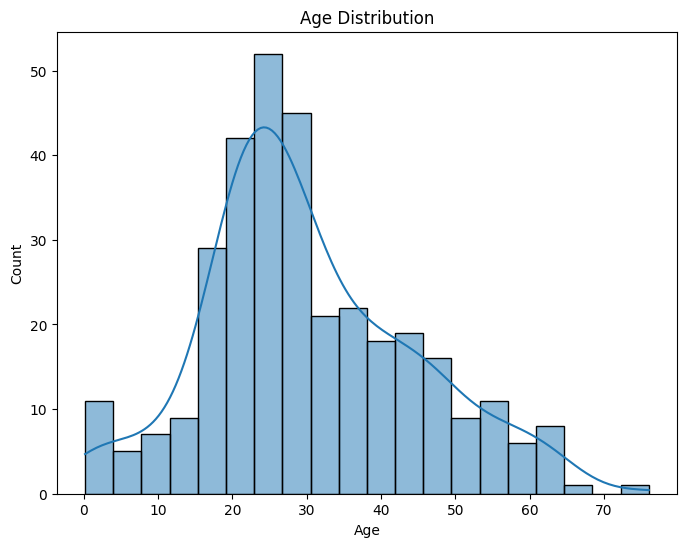

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

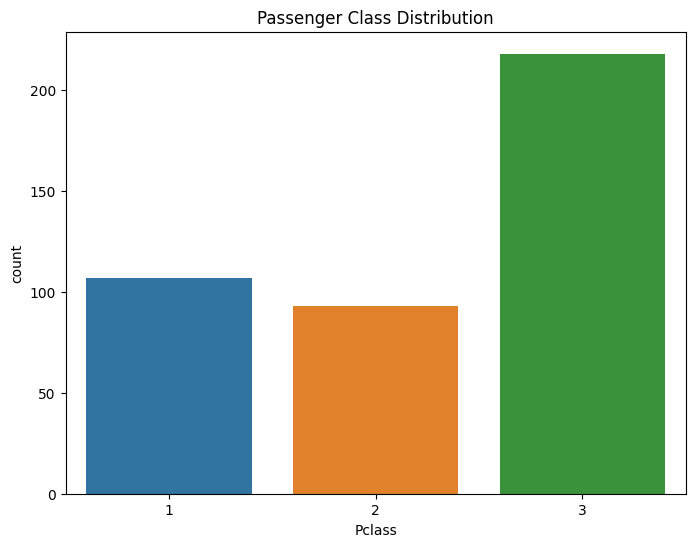

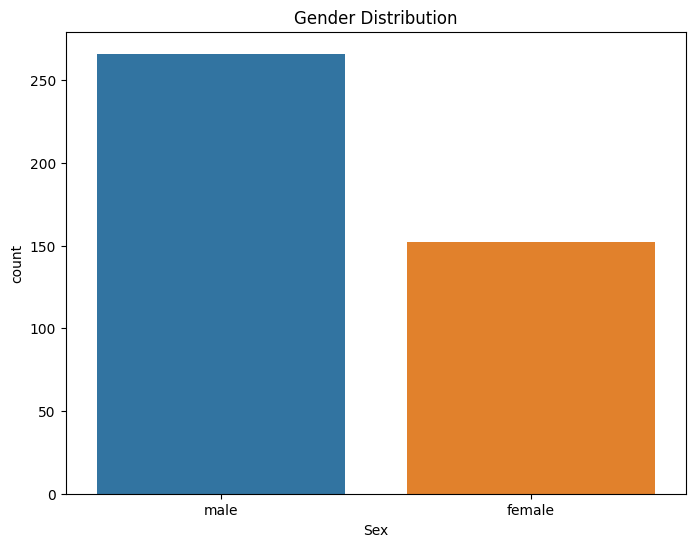

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Pclass')
plt.title('Passenger Class Distribution')
plt.show()



# Count plot for 'Sex' (Gender)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sex')
plt.title('Gender Distribution')
plt.show()


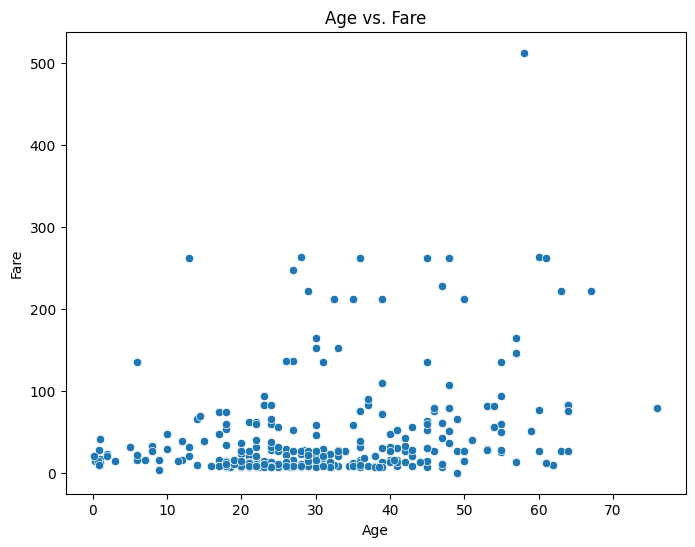

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', data=data)
plt.title('Age vs. Fare')
plt.show()

<ipython-input-26-609fdfdc245b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


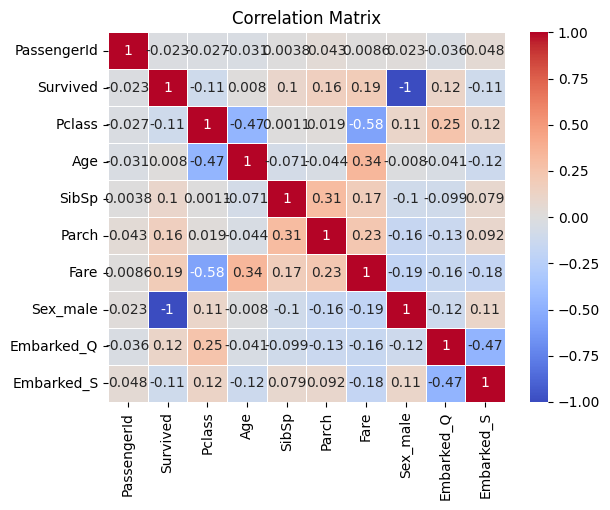

In [26]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [27]:
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.')


In [28]:
bins = [0, 18, 35, 60, 120]
labels = ['Child', 'Young Adult', 'Adult', 'Senior']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)


In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


scaler = StandardScaler()
data['Fare_Standardized'] = scaler.fit_transform(data[['Fare']])


minmax_scaler = MinMaxScaler()
data['Age_Normalized'] = minmax_scaler.fit_transform(data[['Age']])


In [37]:

from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder()


name_encoded = encoder.fit_transform(data[['Name']])

feature_names = encoder.get_feature_names_out(['Name'])


data = data.join(pd.DataFrame(name_encoded.toarray(), columns=feature_names))


data.drop(columns=['Name'], inplace=True)


In [42]:
from sklearn.model_selection import train_test_split


X = data.drop(columns=['Survived'])
y = data['Survived']

X = X.drop(columns=['Ticket'])
X = X.drop(columns=['Title'])
X = X.drop(columns=['AgeGroup'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [43]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [47]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(max_depth=10, min_samples_split=5)


model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [49]:

passenger_ids = X_test['PassengerId'].values


survival_predictions = model.predict(X_test)

results = pd.DataFrame({'PassengerId': passenger_ids, 'Survival_Prediction': survival_predictions})


print(results)


    PassengerId  Survival_Prediction
0          1213                    0
1          1216                    1
2          1280                    0
3           948                    0
4          1045                    1
..          ...                  ...
79          949                    0
80         1018                    0
81          916                    1
82          909                    0
83          958                    1

[84 rows x 2 columns]
